In [2]:
import tensorflow as tf
import numpy as np

tf.__version__

'2.7.0'

## 01. Eager Execution (즉시 실행 모드)
- 결과 바로 확인 가능

### tf.constant( )

In [3]:
a = tf.constant(10)
b = tf.constant(20)

In [4]:
c = a + b
d = (a+b).numpy() # numpy() 메서드는 numpy 값을 리턴

In [7]:
print(type(c))
print(c)
print(type(d), d)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(30, shape=(), dtype=int32)
<class 'numpy.int32'> 30


In [9]:
# tf.convert_to_tenso()메서드는 numpy 값을 tensor 값으로 변환
d_numpy_to_tensor = tf.convert_to_tensor(d)

In [10]:
print(type(d_numpy_to_tensor))
print(d_numpy_to_tensor)

# tensor로 type이 변한 것을 볼 수 있다.

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(30, shape=(), dtype=int32)


### tf.Variable( )

In [11]:
W = tf.Variable(tf.random.normal([1])) # 가우시안 분포

print('initial W = ', W.numpy())

# session 생성 없이 즉시 실행 (eager execution)
# numpy() 메서드는 numpy 값을 리턴

initial W =  [-2.1671124]


In [12]:
for step in range(2):
    W = W + 1.0
    print('step = ', step, ', W = ', W.numpy())

step =  0 , W =  [-1.1671124]
step =  1 , W =  [-0.16711235]


-----
- tf.placeholder 기능 사라짐 (tensorflow 1.x 버전에 있었음)

In [13]:
a = tf.constant(10)
b = tf.constant(20)

In [14]:
# 함수 정의
def tensor_sum(x,y):
    return x + y

result = tensor_sum(a,b)

print(type(result))
print(result.numpy()) # numpy() 메서드는 numpy 값을 리턴

<class 'tensorflow.python.framework.ops.EagerTensor'>
30


## 02. Keras
- sequantial API 방식

In [15]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

import numpy as np

### 0.데이터 생성

In [16]:
X_data = np.array([1,2,3,4,5,6])
y_data = np.array([3,4,5,6,7,8])

### 1. 모델 구축

In [19]:
model = Sequential()

model.add(Flatten(input_shape = (1,))) # 입력층

model.add(Dense(1, activation = 'linear')) # 출력층

# model.add(Dense(1, input_shape = (1,), activation  = 'linear'))

### 2. 모델 컴파일

In [21]:
model.compile(optimizer = SGD(learning_rate = 0.01), loss = 'mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 3. 모델학습

In [22]:
hist = model.fit(X_data, y_data, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 792ms/step - loss: 1.8340
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 1.2804
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 1.0211
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8980
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.8379
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.8070
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7896
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7786
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7704
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7637
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7576
Epoch 12/100
1/1 [==============================] - 0s 22ms/step - loss: 0.7518
Epoch 13/100
1/1 [==============================] -

### 4. 모델 평가 및 예측

In [23]:
result = model.predict(np.array([-3.1, 3.0, 3.5, 15.0, 20.1]))

print(result)

[[-3.560969]
 [ 4.572835]
 [ 5.23954 ]
 [20.573761]
 [27.374155]]


### 5. 모델저장

## 03. 이상분류 분제 (Binary Classification)
- 09강

In [24]:
import tensorflow as tf
import numpy as np

In [33]:
X_data = np.array([2,4,6,8,10,12,14,16,18,20]).astype('float32')
y_data = np.array([0,0,0,0,0,0,1,1,1,1]).astype('float32')

In [30]:
# 01.모델구축

model = tf.keras.models.Sequential()

# 은닉층 8개 노드 / # 입력층 노드 개수
model.add(tf.keras.layers.Dense(8, input_shape = [1,], activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [31]:
# 02.모델 컴파일
model.compile(tf.keras.optimizers.SGD(learning_rate = 0.1), 
              loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 16        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 03. 모델 학습
hist = model.fit(X_data, y_data, epochs = 50)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.6600 - accuracy: 0.6000
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6485 - accuracy: 0.6000
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6384 - accuracy: 0.6000
Epoch 4/50
1/1 [==============================] - 0s 14ms/step - loss: 0.6295 - accuracy: 0.7000
Epoch 5/50
1/1 [==============================] - 0s 29ms/step - loss: 0.6218 - accuracy: 0.7000
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6151 - accuracy: 0.8000
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6094 - accuracy: 0.8000
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6044 - accuracy: 0.9000
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6000 - accuracy: 0.9000
Epoch 10/50
1/1 [==============================] - 0s 13ms/step - loss: 0.5962 - accuracy: 1.0000
Epoch 11/50
1/1 [===================

In [35]:
# 04. 모델 검증

#새로운 데이터
X_test = np.array([0.5, 3.0, 3.5, 11.0, 13.0, 31.0])

sigmoid_value = model.predict(X_test)

# 코드 추가
logical_value = tf.cast(sigmoid_value > 0.5, dtype = tf.float32)

In [37]:
for i in range(len(X_test)):
    print(X_test[i],
         sigmoid_value[i],
         logical_value.numpy()[i])

0.5 [0.19448546] [0.]
3.0 [0.26022208] [0.]
3.5 [0.27182573] [0.]
11.0 [0.4215276] [0.]
13.0 [0.4517964] [0.]
31.0 [0.55425763] [1.]


## 04.MNIST 손글씨 문제
- 10강

## 04_1 데이터 전처리

In [39]:
from tensorflow import keras

mnist = keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [40]:
X_train.shape

(60000, 28, 28)

In [41]:
X_test.shape

(10000, 28, 28)

In [43]:
# X_train

In [45]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

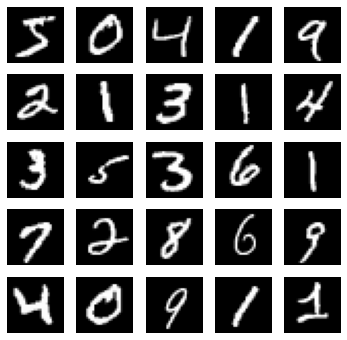

In [44]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize = (6,6))

for index in range(25):
    plt.subplot(5,5, index + 1) # 5행 5열
    plt.imshow(X_train[index], cmap = 'gray')
    plt.axis('off')
    # plt.title(str(y_train[index]))
    
plt.show()

In [48]:
# 학습 데이터 / 테스트 데이터 정규화(normalization)
X_train = (X_train - 0.0) / (255.0 - 0.0)

X_test = (X_test - 0.0) / (255.0 - 0.0)


# 정답 데이터 원핫 인코딩
# 0~9 까지 총 10개 숫자임으로 총 10개의 리스트 만듬 : num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)

y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [76]:
# 01. 모델 구축
# Functional API 해봄 
# input해줄 거 따로 지정해줘야함 주의

input_ = keras.layers.Input(shape=X_train.shape[1:])
# 아이디어 hands-on p. 697
hidden1 = keras.layers.Flatten()(input_)
hidden2 = keras.layers.Dense(100, activation = 'relu')(hidden1)
output = keras.layers.Dense(10, activation = 'softmax')(hidden2)

model = keras.Model(inputs = [input_], outputs = [output])

In [77]:
# 02.컴파일
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy', # 정답을 원핫 인코딩 방식으로 나타냈기 때문
             metrics = ['accuracy'])

model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 100)               78500     
                                                                 
 dense_30 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [78]:
# 03. 모델학습
# training data로부터 30& 비율로 validation data 생성 후 overfitting 확인
hist = model.fit(X_train, y_train, epochs = 30, validation_split = 0.3)

Epoch 1/30
1313/1313 [==============================] - 10s 7ms/step - loss: 1.4485 - accuracy: 0.6614 - val_loss: 0.8054 - val_accuracy: 0.8114
Epoch 2/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.6428 - accuracy: 0.8395 - val_loss: 0.5141 - val_accuracy: 0.8698
Epoch 3/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4726 - accuracy: 0.8746 - val_loss: 0.4177 - val_accuracy: 0.8886
Epoch 4/30
1313/1313 [==============================] - 10s 7ms/step - loss: 0.4044 - accuracy: 0.8905 - val_loss: 0.3733 - val_accuracy: 0.8968
Epoch 5/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3678 - accuracy: 0.8983 - val_loss: 0.3464 - val_accuracy: 0.9009
Epoch 6/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3447 - accuracy: 0.9035 - val_loss: 0.3301 - val_accuracy: 0.9062
Epoch 7/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3283 - accuracy: 0.9073 - val_loss: 0.3175 - val_accura

In [79]:
# 04 모델 평가
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1928 - accuracy: 0.9452


[0.19280876219272614, 0.9452000260353088]

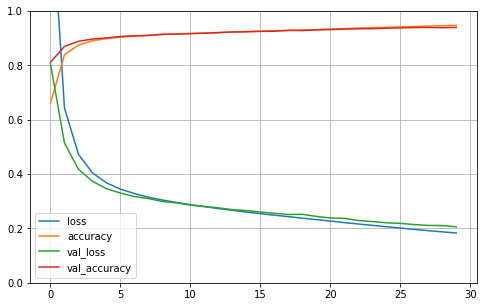

In [81]:
# 04_1. 손실과 정확도

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # 수직축의 범위를 [0-1] 사이로 설정
plt.show()

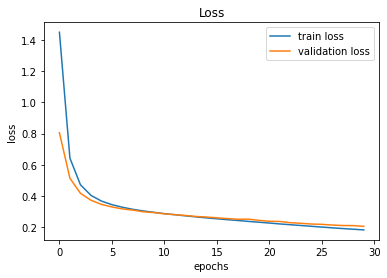

In [83]:
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid

plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')

plt.legend(loc = 'best')

plt.show()

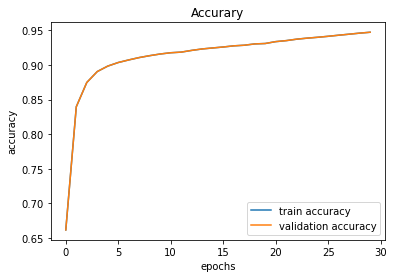

In [84]:
plt.title('Accurary Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid

plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['accuracy'], label = 'validation accuracy')

plt.legend(loc = 'best')

plt.show()

### 05. 혼동 행렬(confution matrix)

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [89]:
plt.figure(figsize = (6,6))

# 테스트 입력 데이터에 대한 prediction 실행
predicted_value = model.predict(X_test) 

<Figure size 432x432 with 0 Axes>

In [90]:
predicted_value

array([[1.4851247e-04, 5.4184488e-09, 5.2371301e-04, ..., 9.9472922e-01,
        2.5025834e-06, 3.1424503e-04],
       [1.6370070e-03, 7.1287085e-04, 9.9240702e-01, ..., 3.5701826e-12,
        3.8779562e-04, 2.3599865e-11],
       [2.0507389e-06, 9.8972160e-01, 2.3997424e-03, ..., 3.2376866e-03,
        1.0092743e-03, 1.9342726e-04],
       ...,
       [2.5344079e-08, 2.9405439e-07, 3.0169736e-07, ..., 2.7093943e-04,
        1.0785981e-03, 1.0090496e-02],
       [1.8496303e-06, 4.0858227e-05, 1.7074053e-07, ..., 2.0522245e-07,
        2.0758273e-02, 1.8874571e-06],
       [3.5232937e-05, 1.2083198e-10, 3.6234844e-05, ..., 5.0637411e-10,
        9.0203690e-07, 9.8724605e-08]], dtype=float32)

In [98]:
np.argmax(y_test, axis = -1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [99]:
cm = confusion_matrix(np.argmax(y_test, axis = -1), # 테스트 데이터 정답
                      np.argmax(predicted_value, axis = -1))

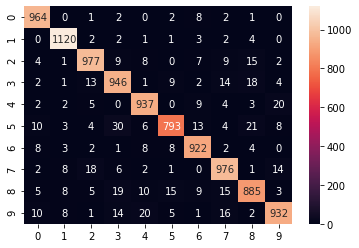

In [100]:
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

- 숫자 5에 대해서 가장 혼란스러워하는 모델

In [102]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') %(i, np.max(cm[i]), np.sum(cm[i]),
                                                   np.max(cm[i])/np.sum(cm[i])))

[[ 964    0    1    2    0    2    8    2    1    0]
 [   0 1120    2    2    1    1    3    2    4    0]
 [   4    1  977    9    8    0    7    9   15    2]
 [   2    1   13  946    1    9    2   14   18    4]
 [   2    2    5    0  937    0    9    4    3   20]
 [  10    3    4   30    6  793   13    4   21    8]
 [   8    3    2    1    8    8  922    2    4    0]
 [   2    8   18    6    2    1    0  976    1   14]
 [   5    8    5   19   10   15    9   15  885    3]
 [  10    8    1   14   20    5    1   16    2  932]]


label = 0	(964/980)	accuracy = 0.984
label = 1	(1120/1135)	accuracy = 0.987
label = 2	(977/1032)	accuracy = 0.947
label = 3	(946/1010)	accuracy = 0.937
label = 4	(937/982)	accuracy = 0.954
label = 5	(793/892)	accuracy = 0.889
label = 6	(922/958)	accuracy = 0.962
label = 7	(976/1028)	accuracy = 0.949
label = 8	(885/974)	accuracy = 0.909
label = 9	(932/1009)	accuracy = 0.924


## 05. fashion-MNIST

In [117]:
# 0. 데이터 불러오기 및 확인
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

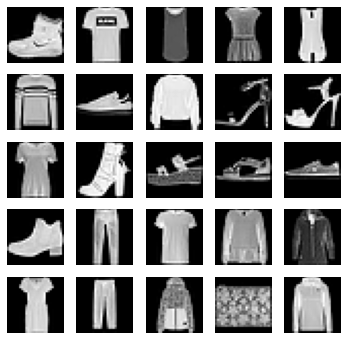

In [118]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize = (6,6))

for index in range(25):
    plt.subplot(5,5, index + 1) # 5행 5열
    plt.imshow(X_train[index], cmap = 'gray')
    plt.axis('off')
    # plt.title(str(y_train[index]))
    
plt.show()

In [119]:
# 학습 데이터 / 테스트 데이터 정규화(normalization)
X_train = (X_train - 0.0) / (255.0 - 0.0)

X_test = (X_test - 0.0) / (255.0 - 0.0)


# 정답 데이터 원핫 인코딩 수행하지 않음
# 0~9 까지 총 10개 숫자임으로 총 10개의 리스트 만듬 : num_classes = 10
# y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)

# y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [123]:
# 01. 모델 구축
# Sequencial API 해봄 

model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = X_train.shape[1:]))
model.add(tf.keras.layers.Dense(100, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [124]:
# 02.컴파일
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss = 'sparse_categorical_crossentropy', # 정답이 원핫 인코딩 방식이 아니기 때문
             metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 100)               78500     
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [125]:
keras.utils.plot_model(model, "fashion_mnist_model_solo_try.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [126]:
# 03. 모델학습
# training data로부터 30& 비율로 validation data 생성 후 overfitting 확인
hist = model.fit(X_train, y_train, epochs = 30, validation_split = 0.3)

Epoch 1/30
1313/1313 [==============================] - 10s 7ms/step - loss: 0.5417 - accuracy: 0.8105 - val_loss: 0.4350 - val_accuracy: 0.8473
Epoch 2/30
1313/1313 [==============================] - 10s 7ms/step - loss: 0.4025 - accuracy: 0.8574 - val_loss: 0.4183 - val_accuracy: 0.8539
Epoch 3/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3618 - accuracy: 0.8698 - val_loss: 0.4053 - val_accuracy: 0.8495
Epoch 4/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3353 - accuracy: 0.8782 - val_loss: 0.3426 - val_accuracy: 0.8769
Epoch 5/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3139 - accuracy: 0.8852 - val_loss: 0.3324 - val_accuracy: 0.8796
Epoch 6/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2962 - accuracy: 0.8911 - val_loss: 0.3473 - val_accuracy: 0.8728
Epoch 7/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2810 - accuracy: 0.8948 - val_loss: 0.3273 - val_accur

In [129]:
# 04 모델 평가
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4438 - accuracy: 0.8769: 0s - loss: 0.4508 - accuracy: 


[0.44383949041366577, 0.8769000172615051]

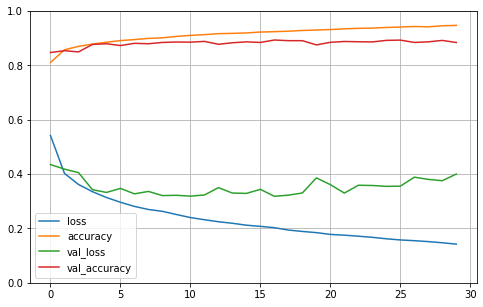

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # 수직축의 범위를 [0-1] 사이로 설정
plt.show()

### 05. 혼동 행렬(confution matrix)

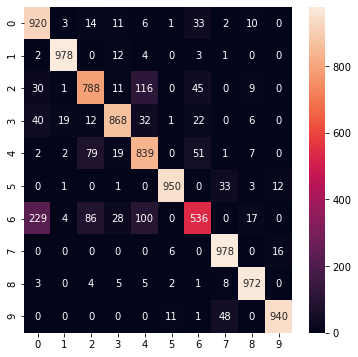

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (6,6))

# 테스트 입력 데이터에 대한 prediction 실행
predicted_value = model.predict(X_test) 

cm = confusion_matrix(y_test, # 테스트 데이터 정답 (5, 7 등의 10진수)
                      np.argmax(predicted_value, axis = -1)) # 예측값이 softmax에 의해 10개(10진수)로 출력됨

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

- shirt에 대해서 가장 혼란스러워하는 모델

In [133]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') %(i, np.max(cm[i]), np.sum(cm[i]),
                                                   np.max(cm[i])/np.sum(cm[i])))

[[920   3  14  11   6   1  33   2  10   0]
 [  2 978   0  12   4   0   3   1   0   0]
 [ 30   1 788  11 116   0  45   0   9   0]
 [ 40  19  12 868  32   1  22   0   6   0]
 [  2   2  79  19 839   0  51   1   7   0]
 [  0   1   0   1   0 950   0  33   3  12]
 [229   4  86  28 100   0 536   0  17   0]
 [  0   0   0   0   0   6   0 978   0  16]
 [  3   0   4   5   5   2   1   8 972   0]
 [  0   0   0   0   0  11   1  48   0 940]]


label = 0	(920/1000)	accuracy = 0.920
label = 1	(978/1000)	accuracy = 0.978
label = 2	(788/1000)	accuracy = 0.788
label = 3	(868/1000)	accuracy = 0.868
label = 4	(839/1000)	accuracy = 0.839
label = 5	(950/1000)	accuracy = 0.950
label = 6	(536/1000)	accuracy = 0.536
label = 7	(978/1000)	accuracy = 0.978
label = 8	(972/1000)	accuracy = 0.972
label = 9	(940/1000)	accuracy = 0.940
